Importing the required

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

Loading and Splitting the data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(x_train[0].shape)

(32, 32, 3)


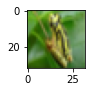

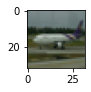

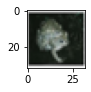

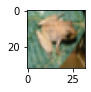

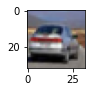

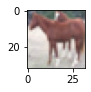

In [ ]:
for i in range(232, 238):
  plt.subplot(120+ 1+ i)
  img = x_train[i]
  plt.imshow(img)
  plt.show()

PreProcessing the Data

In [ ]:
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_test/=255
x_train/=255
n_classes=10

print("Shape before one-hot encoding ",y_train.shape)
y_train = np_utils.to_categorical(y_train,n_classes)
y_test = np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding ",y_train.shape)

Shape before one-hot encoding  (50000, 1)
Shape after one-hot encoding  (50000, 10)


Building the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten


model = Sequential()
#convlutional layers
model.add(Conv2D(50,kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (32,32,3)))

model.add(Conv2D(75,kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(10,activation='Softmax'))

#compiling
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#training the model
model.fit(x_train, y_train, batch_size = 128, epochs = 1, validation_data = (x_test, y_test))

391/391 [==============================] - 489s 1s/step - loss: 1.6401 - accuracy: 0.3987 - val_loss: 1.2245 - val_accuracy: 0.5510


PREDICTING

In [ ]:
classes = range(0, 10)
names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate the batch of 9 images to predict
batch = x_test[100:109]
labels = np.argmax(y_test[100:109],axis=-1)

#make predictions
predictions = model.predict(batch, verbose = 1)


1/1 [==============================] - 0s 140ms/step


In [ ]:
print(predictions)

[[1.1485640e-02 1.5616156e-03 9.7307399e-02 9.6316822e-02 3.7272575e-01
  1.2491606e-01 3.2832585e-02 2.5340405e-01 5.0283675e-03 4.4217804e-03]
 [1.7007947e-02 1.1634941e-02 6.9827721e-02 1.9545491e-01 1.1405091e-01
  2.0869663e-01 1.5183777e-01 1.7534734e-01 1.7469967e-02 3.8671806e-02]
 [3.5052819e-04 2.7529532e-04 1.9435041e-02 1.2979466e-01 7.1946592e-03
  4.5808189e-02 7.9411054e-01 1.5731368e-03 6.3323934e-04 8.2471134e-04]
 [1.7354367e-03 3.8232404e-04 3.2405976e-02 6.8810230e-01 7.0134237e-02
  1.2892935e-01 5.7490438e-02 1.8909082e-02 1.0006459e-03 9.1016665e-04]
 [9.7693875e-03 7.0797968e-01 4.3132293e-04 1.4761325e-03 2.1958377e-04
  3.1143083e-04 3.3981109e-04 4.8864522e-04 3.0108867e-02 2.4887514e-01]
 [1.3126476e-02 8.3346933e-01 4.2311320e-04 8.4229605e-04 6.9295325e-05
  1.6906435e-04 2.9259379e-04 3.0799245e-05 1.2329657e-01 2.8280443e-02]
 [2.7685178e-02 4.2582378e-03 2.8409988e-01 3.1478918e-01 3.3987924e-02
  2.0102496e-01 5.4623760e-02 2.3561183e-02 5.0040331e-02 

In [ ]:
for image in predictions:
  print(np.sum(image))

1.0000001
0.9999999
1.0
0.99999994
1.0
1.0
1.0000001
1.0
0.99999994


In [ ]:
class_result = np.argmax(predictions, axis = -1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


Final Object Detection

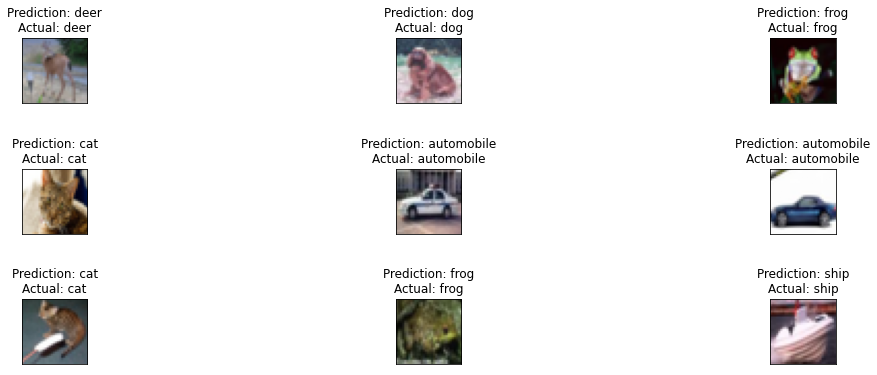

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (19, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten() 

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
  
  # plot the image
  axs[i].imshow(img)

# show the plot
plt.show()